# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
#### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matricies 

In [5]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

#### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [6]:
n = 36000
display(X[n])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

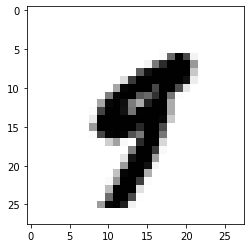

In [7]:
X_reshape = X.reshape((70000,28,28))

plt.imshow(X_reshape[n], cmap = matplotlib.cm.binary, interpolation = 'nearest')

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [8]:
display(y[n])

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [25]:
n = 60000

X_train, y_train, X_test, y_test = X[:n], y[:n], X[n:], y[n:]

print(f"{X_train.shape} \t {y_train.shape} \t {X_test.shape} \t {y_test.shape}")

(60000, 784) 	 (60000,) 	 (10000, 784) 	 (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [45]:
def filter_array(a):
    if a == '5': return True
    else: return False
    
# using broadcasting from numpy to avoid loops
vect_filter = np.vectorize(filter_array)
tr_bool = vect_filter(y_train).tolist()
te_bool = vect_filter(y_test).tolist()

# boolean list -> indexing filter
X_train_5, y_train_5, X_test_5, y_test_5 = X_train[tr_bool], y_train[tr_bool], X_test[te_bool], y_test[te_bool]
print(f"{X_train_5.shape} \t {y_train_5.shape} \t {X_test_5.shape} \t {y_test_5.shape}")

(5421, 784) 	 (60000,) 	 (892, 784) 	 (10000,)


In [42]:
display(y_train_5) # comprobación, me ha cogido los sólo cincos

array(['5', '5', '5', ..., '5', '5', '5'], dtype=object)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [48]:
import tensorflow as tf
import tensorflow.keras as keras

# the above division isnt valid --> LR doesnt work with only one cat
# Estimator using the default optimizer.

estimator = tf.estimator.LinearClassifier(
                    feature_columns=[categorical_column_a,
                     categorical_feature_a_x_categorical_feature_b])


/home/lucia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### Does the classifier predict correctly the 36000th digit we picked before?

In [52]:
y_tr_5.shape

(60000,)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?